# Lapage Analyse Marketing

Importation des librairies et des fichiers csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as datetime
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

customers = pd.read_csv(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 6 - Lapage/DAN-P6-donnees/customers.csv')
products = pd.read_csv(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 6 - Lapage/DAN-P6-donnees/products.csv')
transactions = pd.read_csv(r'C:/Users/alois/Desktop/Formation Aloïs/Projet 6 - Lapage/DAN-P6-donnees/transactions.csv')

Jointure interne entre les fichiers csv

In [2]:
CA = pd.merge(products, transactions, on='id_prod' )
CA = pd.merge(CA, customers, on='client_id')

Suppression des clients "test", changement du format de la colonne date, ajout de la colonne 'age'

In [3]:
CA = CA[~CA['date'].str.contains('test_')]
CA['date']=pd.to_datetime(CA['date'])
CA['year'] = CA['date'].dt.year
CA['month']= CA['date'].dt.month
CA['month+year'] = CA['year'].astype(str)+"-"+CA['month'].astype(str)
CA['age']=CA['year']-CA['birth'] 

# Calcul du chiffre d'affaire pour chaque categorie par mois et par année

In [4]:
CA_by_month = CA.groupby(['year','month','categ']).agg({'price'  : sum })
CA_by_month = CA_by_month.pivot_table('price',['year','month'],'categ')
CA_by_month['Total'] = CA_by_month[0]+CA_by_month[1]+CA_by_month[2]

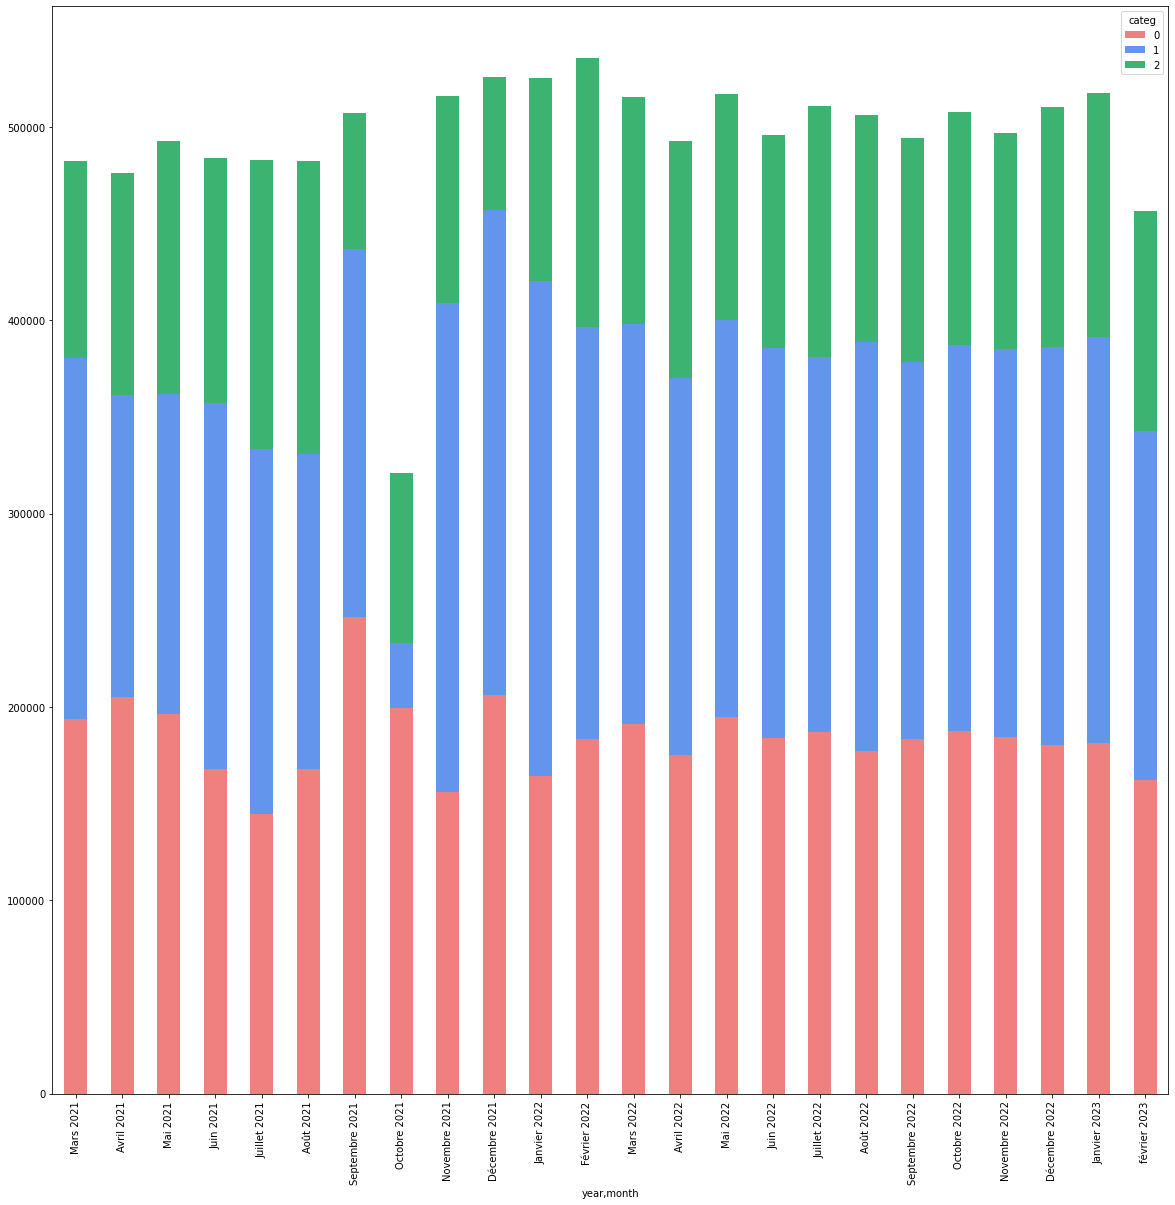

In [5]:
ax = CA_by_month.plot(figsize = (20,20),y=[0,1,2],kind='bar',stacked=True , color=['lightcoral','cornflowerblue','mediumseagreen'])
ax.set_xticklabels(["Mars 2021",'Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Septembre 2021','Octobre 2021','Novembre 2021','Décembre 2021','Janvier 2022','Février 2022','Mars 2022','Avril 2022','Mai 2022','Juin 2022','Juillet 2022','Août 2022','Septembre 2022','Octobre 2022','Novembre 2022','Décembre 2022','Janvier 2023',"février 2023"]);


# Moyenne Mobile

In [6]:
CA_by_month_mean = CA.groupby(['year','month','categ'],as_index=False).agg({'price'  : sum })
CA_by_month_mean['Date'] = CA_by_month_mean['year'].astype(str)+"-"+CA_by_month_mean['month'].astype(str)
CA_by_month_mean = CA_by_month_mean.pivot_table('price',['year','month','Date'],'categ')
CA_by_month_mean['Total'] = CA_by_month_mean[0]+CA_by_month_mean[1]+CA_by_month_mean[2]

Categorie 0

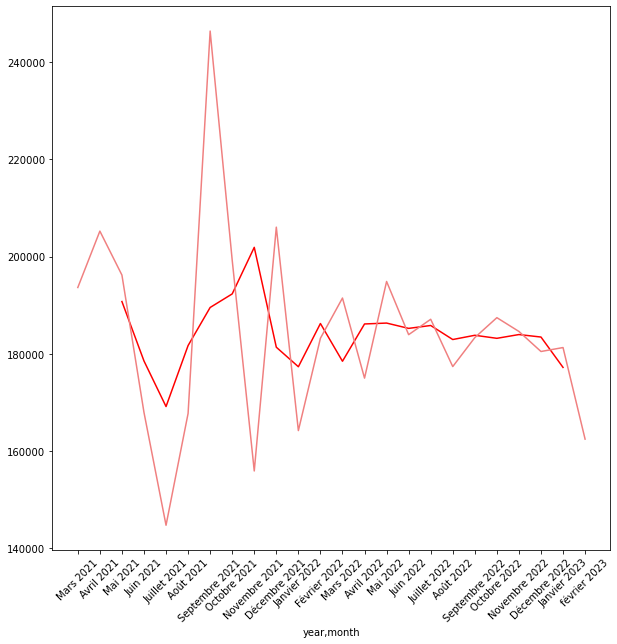

In [7]:
pd.Series(CA_by_month_mean[0])
CA_by_month_mean_0 = CA_by_month_mean[0].rolling(4,center=True).mean()
a0 = CA_by_month_mean_0.plot(figsize = (10,10),kind='line', color="red")
graph0 = CA_by_month[0].plot(ax=a0, color='lightcoral')
s =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
graph0.set_xticks(s)
graph0.set_xticklabels(["Mars 2021",'Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Septembre 2021','Octobre 2021','Novembre 2021','Décembre 2021','Janvier 2022','Février 2022','Mars 2022','Avril 2022','Mai 2022','Juin 2022','Juillet 2022','Août 2022','Septembre 2022','Octobre 2022','Novembre 2022','Décembre 2022','Janvier 2023',"février 2023"],rotation = 45);

Nous pouvons observer ici que les ventes de la catégorie 0 ont eues de grandes variations en 2021 pour finalement commencer à se stabiliser en début 2022.

Categorie 1

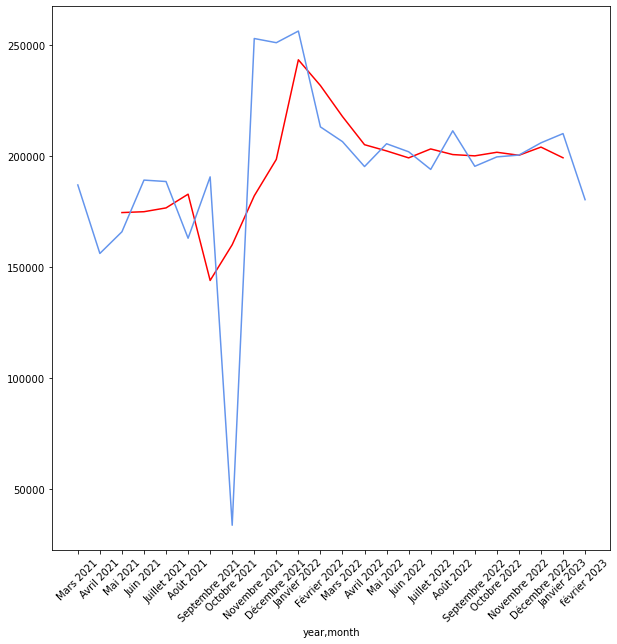

In [8]:
pd.Series(CA_by_month_mean[1])
CA_by_month_mean_1 = CA_by_month_mean[1].rolling(4,center=True).mean()
a1 = CA_by_month_mean_1.plot(figsize = (10,10),kind='line',color='red')
graph1 = CA_by_month[1].plot(ax=a1,color='cornflowerblue')
s =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
graph1.set_xticks(s)
graph1.set_xticklabels(["Mars 2021",'Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Septembre 2021','Octobre 2021','Novembre 2021','Décembre 2021','Janvier 2022','Février 2022','Mars 2022','Avril 2022','Mai 2022','Juin 2022','Juillet 2022','Août 2022','Septembre 2022','Octobre 2022','Novembre 2022','Décembre 2022','Janvier 2023',"février 2023"],rotation = 45);


Nous observons pour la catégorie 1 une baisse des ventes en fin d'été 2021 pour finalement repartir à la hausse jusqu'au printemps 2022 et retrouver des ventes stables jusqu'à la fin de l'année 2022

Categorie 2

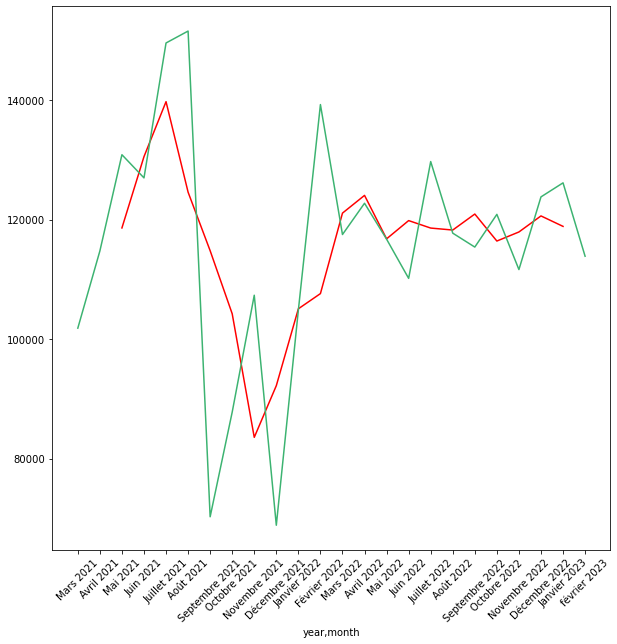

In [9]:
pd.Series(CA_by_month_mean[2])
CA_by_month_mean_2 = CA_by_month_mean[2].rolling(4,center=True).mean()
a2 = CA_by_month_mean_2.plot(figsize = (10,10),kind='line',color='red')
graph2 = CA_by_month[2].plot(ax=a2,color ='mediumseagreen')
s =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
graph2.set_xticks(s)
graph2.set_xticklabels(["Mars 2021",'Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Septembre 2021','Octobre 2021','Novembre 2021','Décembre 2021','Janvier 2022','Février 2022','Mars 2022','Avril 2022','Mai 2022','Juin 2022','Juillet 2022','Août 2022','Septembre 2022','Octobre 2022','Novembre 2022','Décembre 2022','Janvier 2023',"février 2023"],rotation = 45);

Concernant la catégorie 2 nous avons un bonne montée des ventes en été 2021 mais elle est aussitôt suivit de deux chutes des ventes en septembre 2022 et décembre 2022 pour finalement remonter sans réellement se stabiliser mais sans pour autant rechuter de manière si drastique 

Total

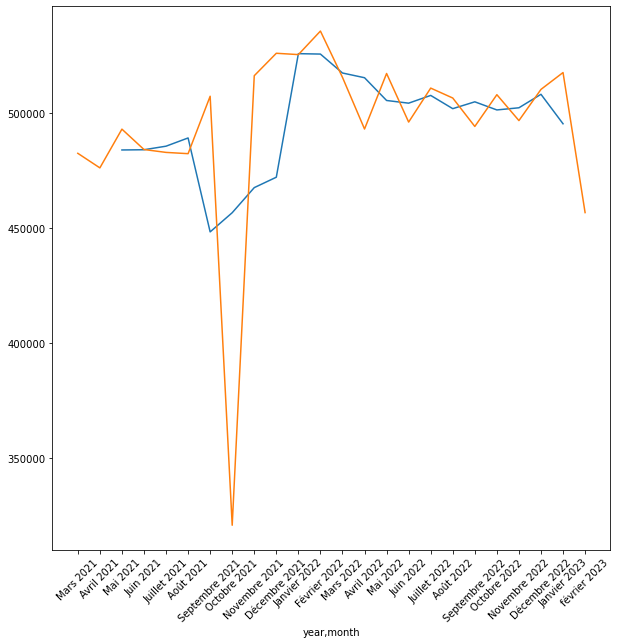

In [10]:
pd.Series(CA_by_month_mean['Total'])
CA_by_month_mean_total = CA_by_month_mean['Total'].rolling(4,center=True).mean()
a_total = CA_by_month_mean_total.plot(figsize = (10,10),kind='line')
graph_total = CA_by_month['Total'].plot(ax=a_total)
s =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
graph_total.set_xticks(s)
graph_total.set_xticklabels(["Mars 2021",'Avril 2021','Mai 2021','Juin 2021','Juillet 2021','Août 2021','Septembre 2021','Octobre 2021','Novembre 2021','Décembre 2021','Janvier 2022','Février 2022','Mars 2022','Avril 2022','Mai 2022','Juin 2022','Juillet 2022','Août 2022','Septembre 2022','Octobre 2022','Novembre 2022','Décembre 2022','Janvier 2023',"février 2023"],rotation = 45);

Sur la tendance globale nous pouvons donc observer que nous avons une une grosse baisse du chiffre d'affaire aux alentours du moi de septembre mais que nos ventes se sont globalement stabilisées en début printemps 2022.

# Analyse pour chaque catégories

In [11]:
CA_by_product_category0 = CA.loc[CA['categ'] == 0]
CA_by_product_category1 = CA.loc[CA['categ'] == 1]
CA_by_product_category2 = CA.loc[CA['categ'] == 2]

Top produit de la catégorie 0

In [12]:
product_categ0 = CA_by_product_category0.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ0 = product_categ0.sort_values(by=['month+year','price'], ascending=(True,False))
product_categ0 = product_categ0.groupby(level=0).head(1)
product_categ0

,,price
month+year,id_prod,
2021-10,0_1421,1199.40
2021-11,0_1430,1004.67
2021-12,0_1470,1288.98
2021-3,0_1441,1158.39
2021-4,0_1414,1182.18
2021-5,0_1441,1177.38
2021-6,0_1421,1039.48
2021-7,0_1342,993.99
2021-8,0_1414,1027.14


Flop produit de la categorie 0

In [13]:

product_categ0 = CA_by_product_category0.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ0 = product_categ0.sort_values(by=['month+year','price'], ascending=(True,True))
product_categ0 = product_categ0.groupby(level=0).head(1)
product_categ0

,,price
month+year,id_prod,
2021-10,0_202,0.62
2021-11,0_2138,0.93
2021-12,0_1364,0.81
2021-3,0_202,0.62
2021-4,0_202,0.62
2021-5,0_202,0.62
2021-6,0_902,0.92
2021-7,0_120,0.66
2021-8,0_202,0.62


Top produit de la categorie 1

In [14]:
product_categ1 = CA_by_product_category1.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ1 = product_categ1.sort_values(by=['month+year','price'], ascending=(True,False))
product_categ1 = product_categ1.groupby(level=0).head(1)
product_categ1

,,price
month+year,id_prod,
2021-10,1_432,532.40
2021-11,1_395,3594.76
2021-12,1_431,2882.97
2021-3,1_498,2266.89
2021-4,1_366,1997.80
2021-5,1_383,1855.36
2021-6,1_383,2319.20
2021-7,1_395,2522.13
2021-8,1_406,2158.47


Flop produit de la categorie 1

In [15]:
product_categ1 = CA_by_product_category1.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ1 = product_categ1.sort_values(by=['month+year','price'], ascending=(True,True))
product_categ1 = product_categ1.groupby(level=0).head(1)
product_categ1

,,price
month+year,id_prod,
2021-10,1_102,3.29
2021-11,1_36,2.64
2021-12,1_332,2.24
2021-3,1_332,2.24
2021-4,1_332,2.24
2021-5,1_332,2.24
2021-6,1_332,2.24
2021-7,1_36,2.64
2021-8,1_238,2.00


Top produit de la categorie 2

In [16]:
product_categ2 = CA_by_product_category2.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ2 = product_categ2.sort_values(by=['month+year','price'], ascending=(True,False))
product_categ2 = product_categ2.groupby(level=0).head(1)
product_categ2

,,price
month+year,id_prod,
2021-10,2_159,2627.82
2021-11,2_159,3941.73
2021-12,2_159,3795.74
2021-3,2_159,4087.72
2021-4,2_159,3357.77
2021-5,2_159,4233.71
2021-6,2_135,3518.49
2021-7,2_135,4277.38
2021-8,2_159,4963.66


Flop produit de la categorie 2

In [17]:
product_categ2 = CA_by_product_category2.groupby(['month+year','id_prod']).agg({'price' : sum})
product_categ2 = product_categ2.sort_values(by=['month+year','price'], ascending=(True,True))
product_categ2 = product_categ2.groupby(level=0).head(1)
product_categ2

,,price
month+year,id_prod,
2021-10,2_33,30.99
2021-11,2_45,32.99
2021-12,2_107,33.99
2021-3,2_33,30.99
2021-4,2_67,32.99
2021-5,2_33,30.99
2021-6,2_47,36.99
2021-7,2_33,30.99
2021-8,2_33,30.99


# Répartition des prix par catégorie

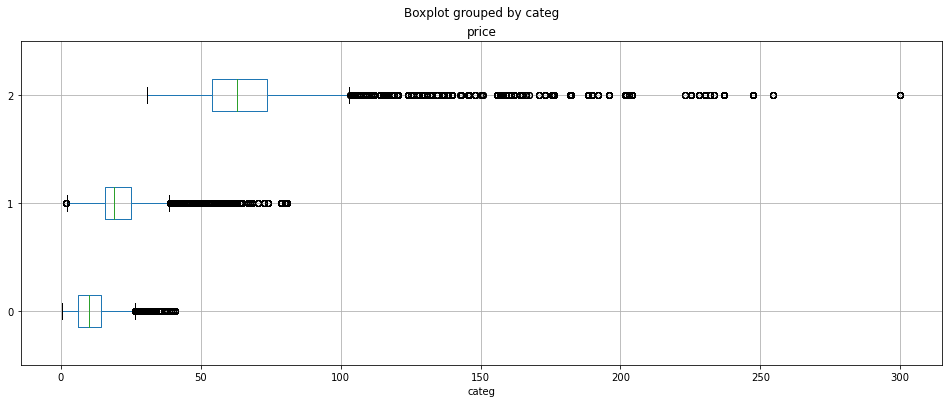

In [18]:
Repartition_prix_categ = CA[['id_prod','price','categ']]
ax2 = Repartition_prix_categ.boxplot(column = 'price',by='categ',vert=False,figsize = (16,6))

# Répartition des ventes entre clients - Courbe de Lorenz

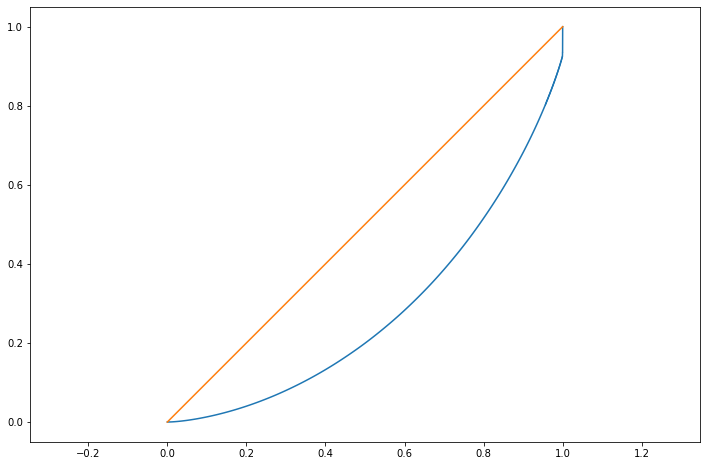

In [19]:
CA_by_customers = CA.groupby(['client_id','birth']).agg({'price' : sum})
depenses = CA_by_customers[CA_by_customers['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
fig = plt.figure(1, figsize=(12,8))
plt.axes().axis('equal')
xaxis = np.linspace(0,1,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])
plt.show()

In [20]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC
gini = 2*S
gini

0.4463865413740109

In [21]:
CA_by_customers = CA_by_customers.merge(customers, on='client_id')
CA_by_customers.sort_values(by='price')

,client_id,price,sex,birth
8151,c_8351,6.31,f,1968
7918,c_8140,8.30,m,1971
7889,c_8114,9.98,m,1962
1556,c_240,11.06,m,1998
4044,c_4648,11.20,m,2004
...,...,...,...,...
2513,c_3263,5276.87,f,1985
2724,c_3454,113637.93,m,1969
6337,c_6714,153598.92,f,1968
4388,c_4958,289760.34,m,1999


# Répartition des ventes entre clients (sans clients particuliers) - Courbe de Lorenz

In [22]:
Clients_particuliers = CA_by_customers[(CA_by_customers['client_id'] == "c_3454") | (CA_by_customers['client_id'] == "c_6714") | (CA_by_customers['client_id'] == "c_4958") | (CA_by_customers['client_id'] == "c_1609")].index
CA_by_customers_CP = CA_by_customers
CA_by_customers_CP.drop(Clients_particuliers, inplace=True)

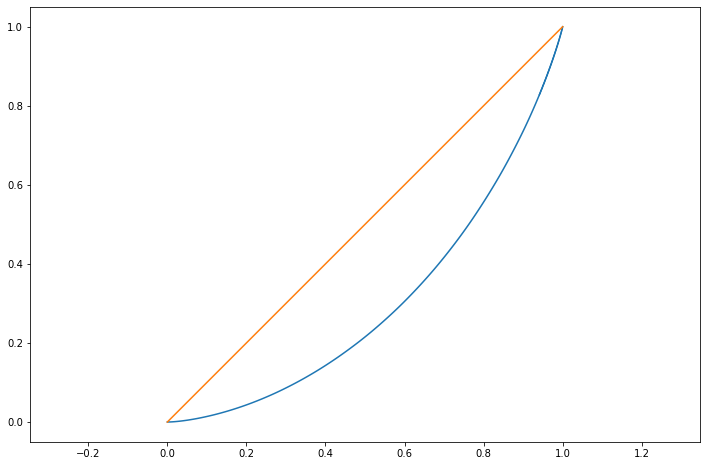

In [23]:
depenses = CA_by_customers_CP[CA_by_customers_CP['price'] > 0]
dep = depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)
fig = plt.figure(1, figsize=(12,8))
plt.axes().axis('equal')
xaxis = np.linspace(0,1,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])
plt.show()

In [24]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC
gini = 2*S
gini

0.4026168654949772

# Relation entre le genre et la catégorie

In [25]:
CA_by_customers_categ = CA.groupby(['client_id','sex','birth','categ'],as_index=False).agg({'price' : sum})
CA_by_customers_categ.drop(Clients_particuliers, inplace=True)

Tableau de contingence

In [26]:
X = "sex"
Y = "categ"
cont = CA_by_customers_categ[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,4120,4391,1840,10351
m,3775,4060,1756,9591
Total,7895,8451,3596,19942


Heatmap

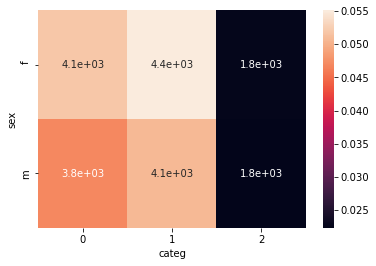

In [27]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(CA)
indep =( tx.dot(ty) / n )
c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (cont-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [28]:
cont = cont[:2].drop("Total",axis=1)

Soit notre hypothèse nulle H0 le fait qu'il n'y ai pas de relation entre le genre d'un client et la catégorie de livre qu'il achète.
Pour le test nous imposons un seuil α à 5%. α = 0.005
Si p <= α, nous rejetons notre hypthose nulle H0. Si p > α , échec du rejet de l'hyothese nulle H0.
Voici un lien du tableau de la loi du Khi-deux : https://archimede.mat.ulaval.ca/stt1920/STT-1920-Loi-du-khi-deux.pdf


In [29]:
chi2, p, dof, ex = chi2_contingency(cont, correction=False)
chi2_contingency(cont)

(1.0399571097937856,
 0.5945332976613535,
 2,
 array([[4097.94127971, 4386.53600441, 1866.52271588],
        [3797.05872029, 4064.46399559, 1729.47728412]]))

Chi2 = 1.0399571097937856 , p-value = 0.5945332976613535 et Degrés de liberté = 2



Après avoir vérifier dans notre tableau la valeur du quantile correspondant, nous pouvons voir que notre Chi2 calculé(1.03) est inférieur au quantile donné (1..39) donc nous pouvons rejeter l'hypothèse H0 et dire qu'il n'y a une relation entre le genre d'un client et la catégorie de livre qu'il achète

# Relation entre l'age et le montant

In [30]:
CA_by_age = CA
CA_by_age = CA_by_age.groupby('age',as_index=False)['price'].sum()

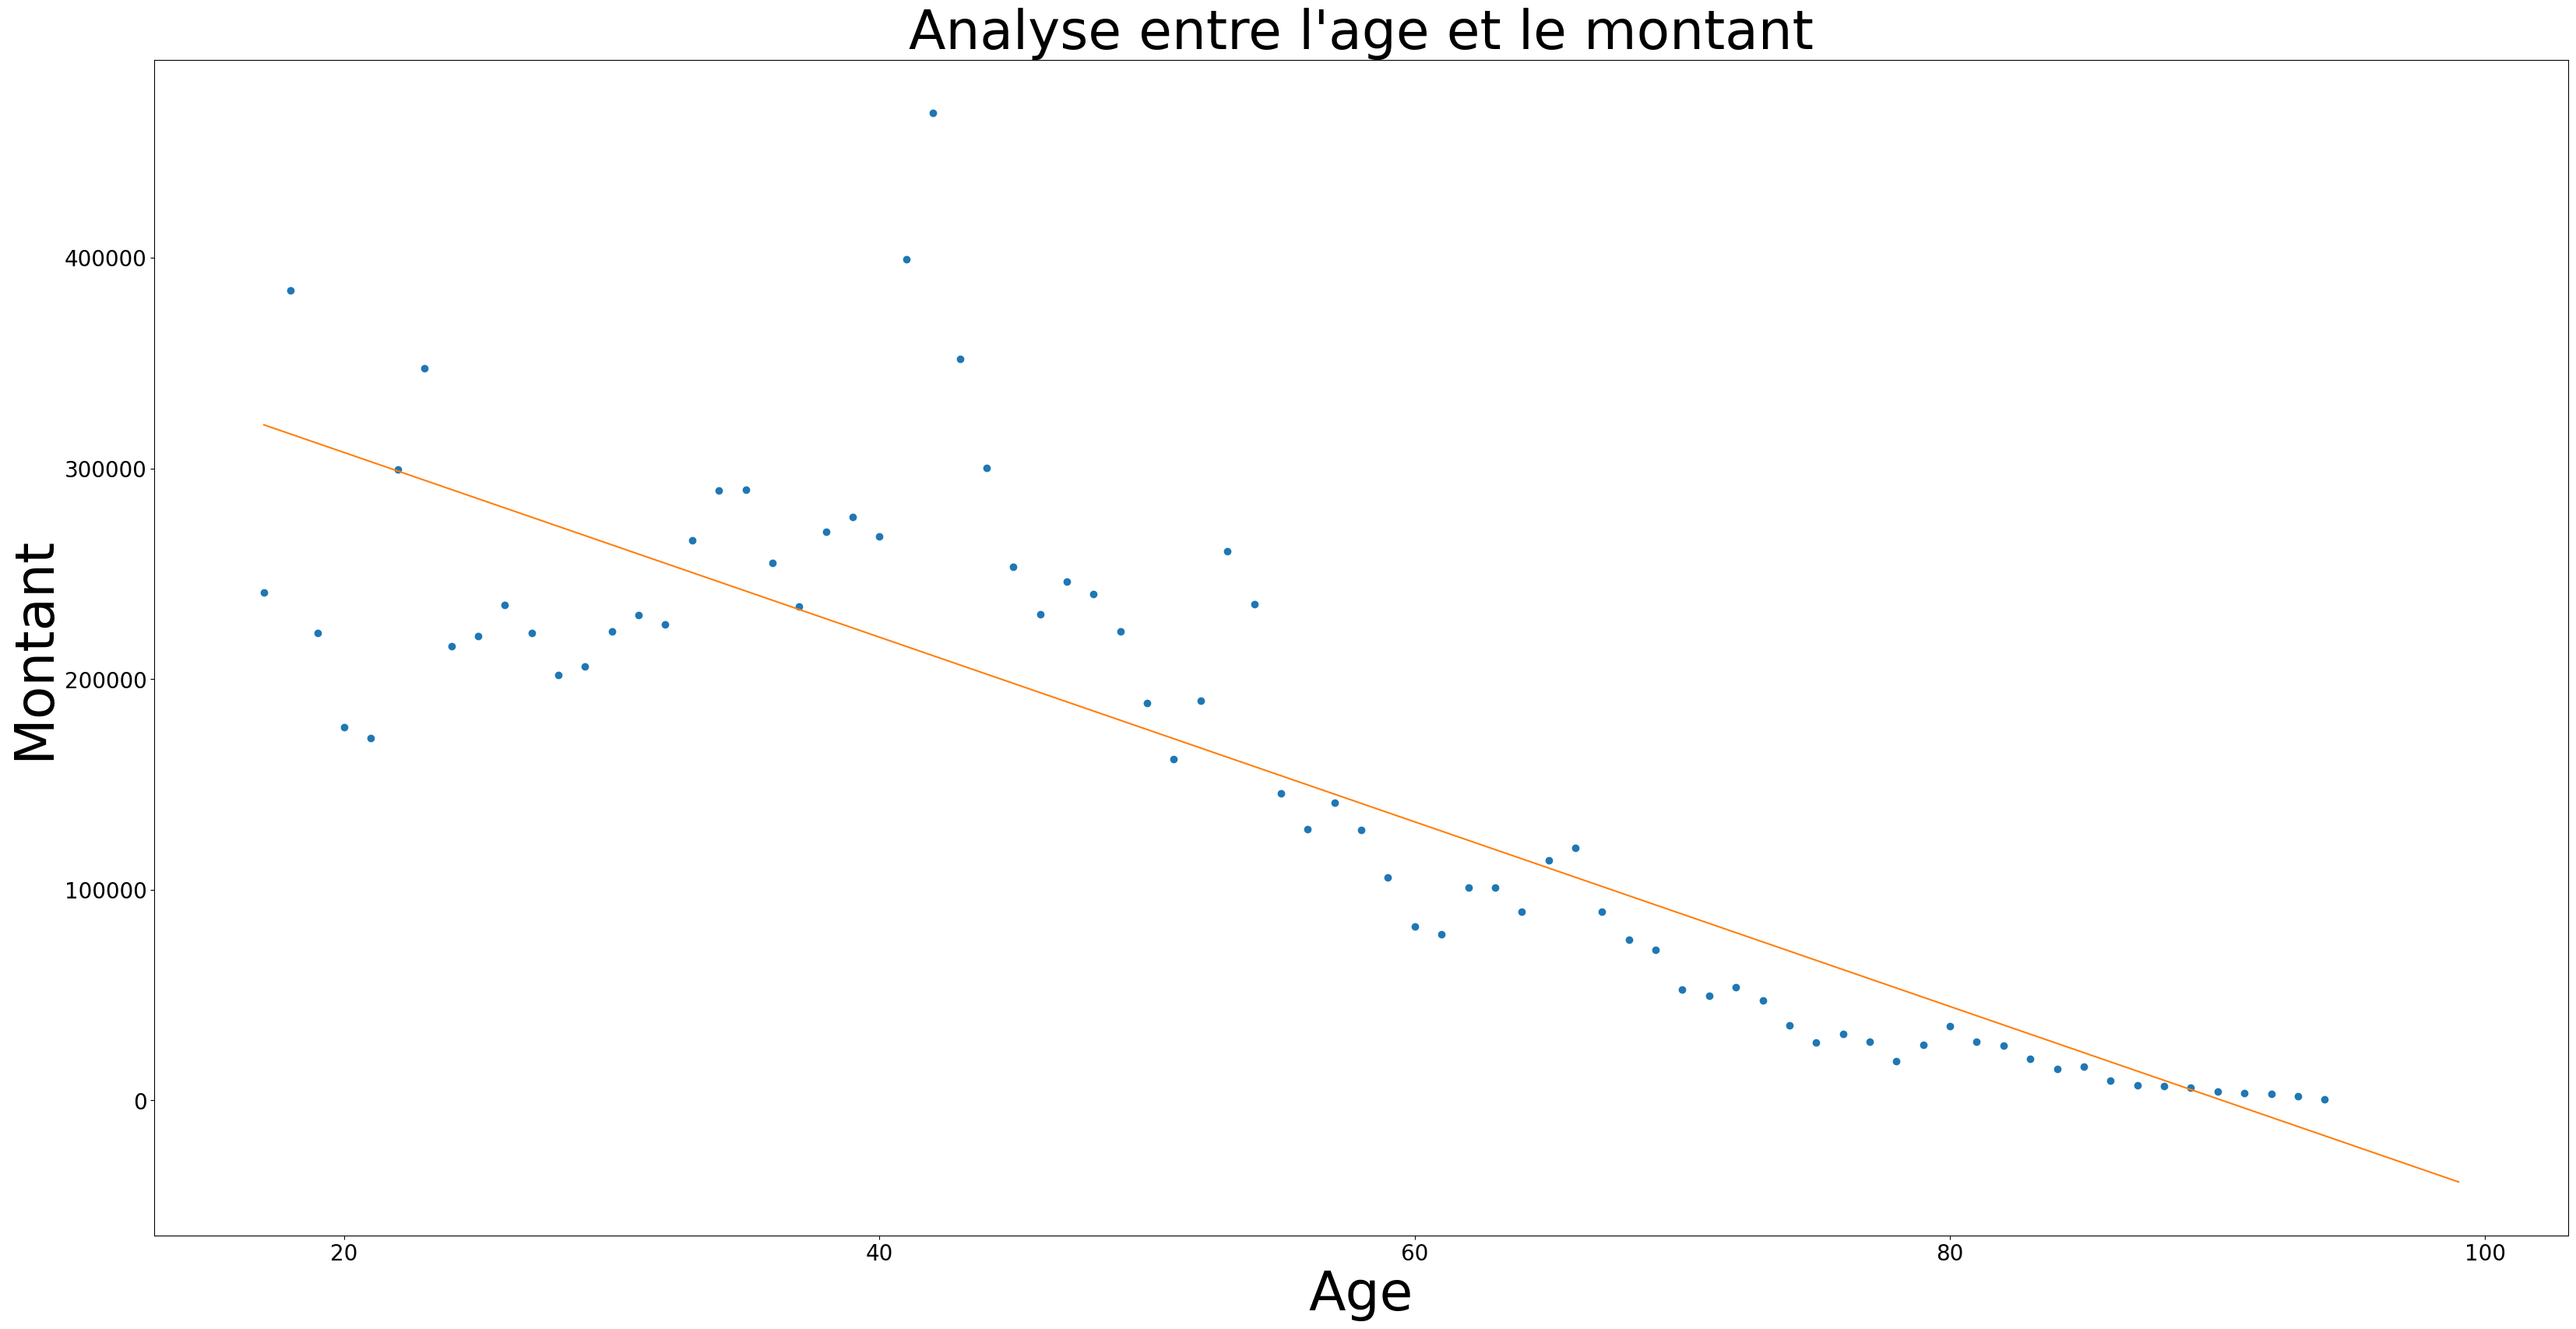

In [31]:
X = CA_by_age[["age"]]
Y = CA_by_age["price"]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(40,20), dpi=100)
plt.xticks(fontsize=20)
plt.xlabel("Age",fontsize = 50)
plt.ylabel("Montant",fontsize = 50)
plt.yticks(fontsize=20)
plt.plot(CA_by_age.age,CA_by_age.price, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et le montant",fontsize = 50);


In [32]:
print(stats.pearsonr( CA_by_age['age'],CA_by_age['price']))

(-0.8567390790209988, 1.4813171812886593e-23)


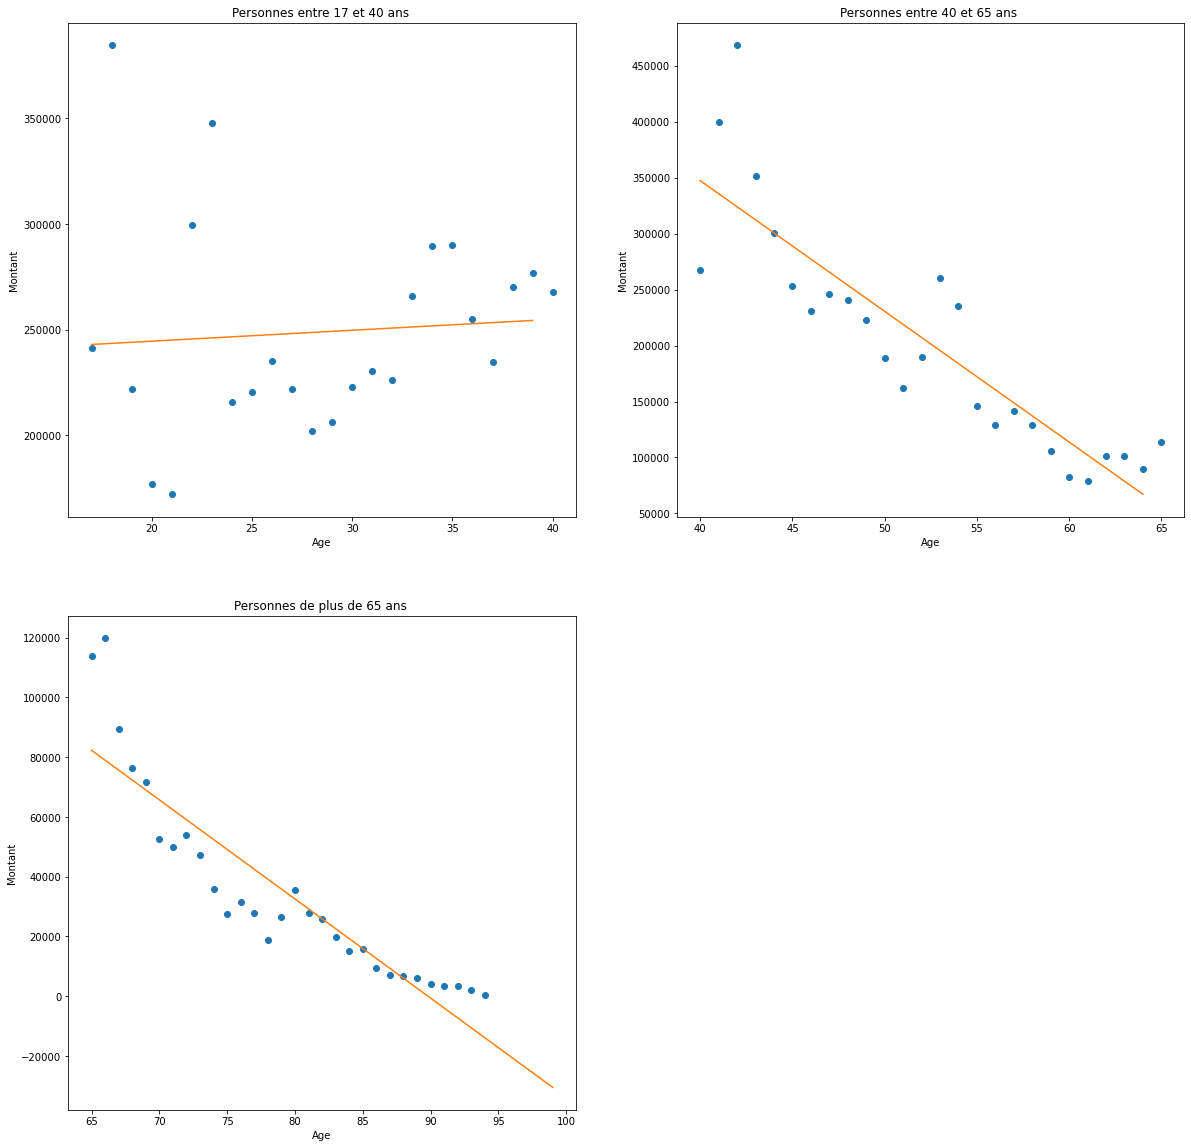

In [33]:
CA_by_age_under40 = CA_by_age[CA_by_age['age'].between(17,40)]
CA_by_age_between40and65 = CA_by_age[CA_by_age['age'].between(40,65)]
CA_by_age_above65 = CA_by_age[CA_by_age['age'].between(65,130)]

CA_by_age_sub = plt.figure(figsize=(20,20))


ax = CA_by_age_sub.add_subplot(221)
X1 = CA_by_age_under40[["age"]]
Y1 = CA_by_age_under40["price"]
X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
ax.plot(CA_by_age_under40.age,CA_by_age_under40.price, "o")
ax.plot(np.arange(17,40),[a*x+b for x in np.arange(17,40)])
ax.set_xlabel("Age")
ax.set_ylabel("Montant")
ax.set_title('Personnes entre 17 et 40 ans ')

ax2 = CA_by_age_sub.add_subplot(222)
X2 = CA_by_age_between40and65[["age"]]
Y2 = CA_by_age_between40and65["price"]
X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
ax2.plot(CA_by_age_between40and65.age,CA_by_age_between40and65.price, "o")
ax2.plot(np.arange(40,65),[a*x+b for x in np.arange(40,65)])
ax2.set_xlabel("Age")
ax2.set_ylabel("Montant")
ax2.set_title('Personnes entre 40 et 65 ans ')


ax3 = CA_by_age_sub.add_subplot(223)
X3 = CA_by_age_above65[["age"]]
Y3 = CA_by_age_above65["price"]
X3 = X3.copy()
X3['intercept'] = 1.
result = sm.OLS(Y3, X3).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
ax3.plot(CA_by_age_above65.age,CA_by_age_above65.price, "o")
ax3.plot(np.arange(65,100),[a*x+b for x in np.arange(65,100)])
ax3.set_xlabel("Age")
ax3.set_ylabel("Montant");
ax3.set_title('Personnes de plus de 65 ans ');


Calcule des differents coefficients de Pearson

In [34]:
print(stats.pearsonr(CA_by_age_under40["age"],CA_by_age_under40["price"]))
print(stats.pearsonr(CA_by_age_between40and65["age"],CA_by_age_between40and65["price"]))
print(stats.pearsonr(CA_by_age_above65['age'],CA_by_age_above65['price']))

(0.07373807086840922, 0.7320321692373536)
(-0.8806364782088114, 2.964255069630383e-09)
(-0.9032059076585051, 8.51468031198802e-12)


# Relation entre l'age et la fréquence d'achat

In [35]:
Freq_by_age = CA
Freq_by_age['Total Purchase'] = Freq_by_age['price'].sum()
Freq_by_age = Freq_by_age.groupby(['age','client_id'], as_index=False)['session_id'].count()
Freq_by_age['Total_Customer']= Freq_by_age['client_id'].count()
Freq_by_age = Freq_by_age.groupby(['age','Total_Customer'], as_index=False)['session_id'].sum()
Freq_by_age['Purchase_Freq'] = Freq_by_age['session_id']/Freq_by_age['Total_Customer']
Freq_by_age

,age,Total_Customer,session_id,Purchase_Freq
0,17,24186,5935,0.245390
1,18,24186,9636,0.398412
2,19,24186,5408,0.223600
3,20,24186,4430,0.183164
4,21,24186,4305,0.177996
...,...,...,...,...
73,90,24186,243,0.010047
74,91,24186,210,0.008683
75,92,24186,196,0.008104
76,93,24186,129,0.005334


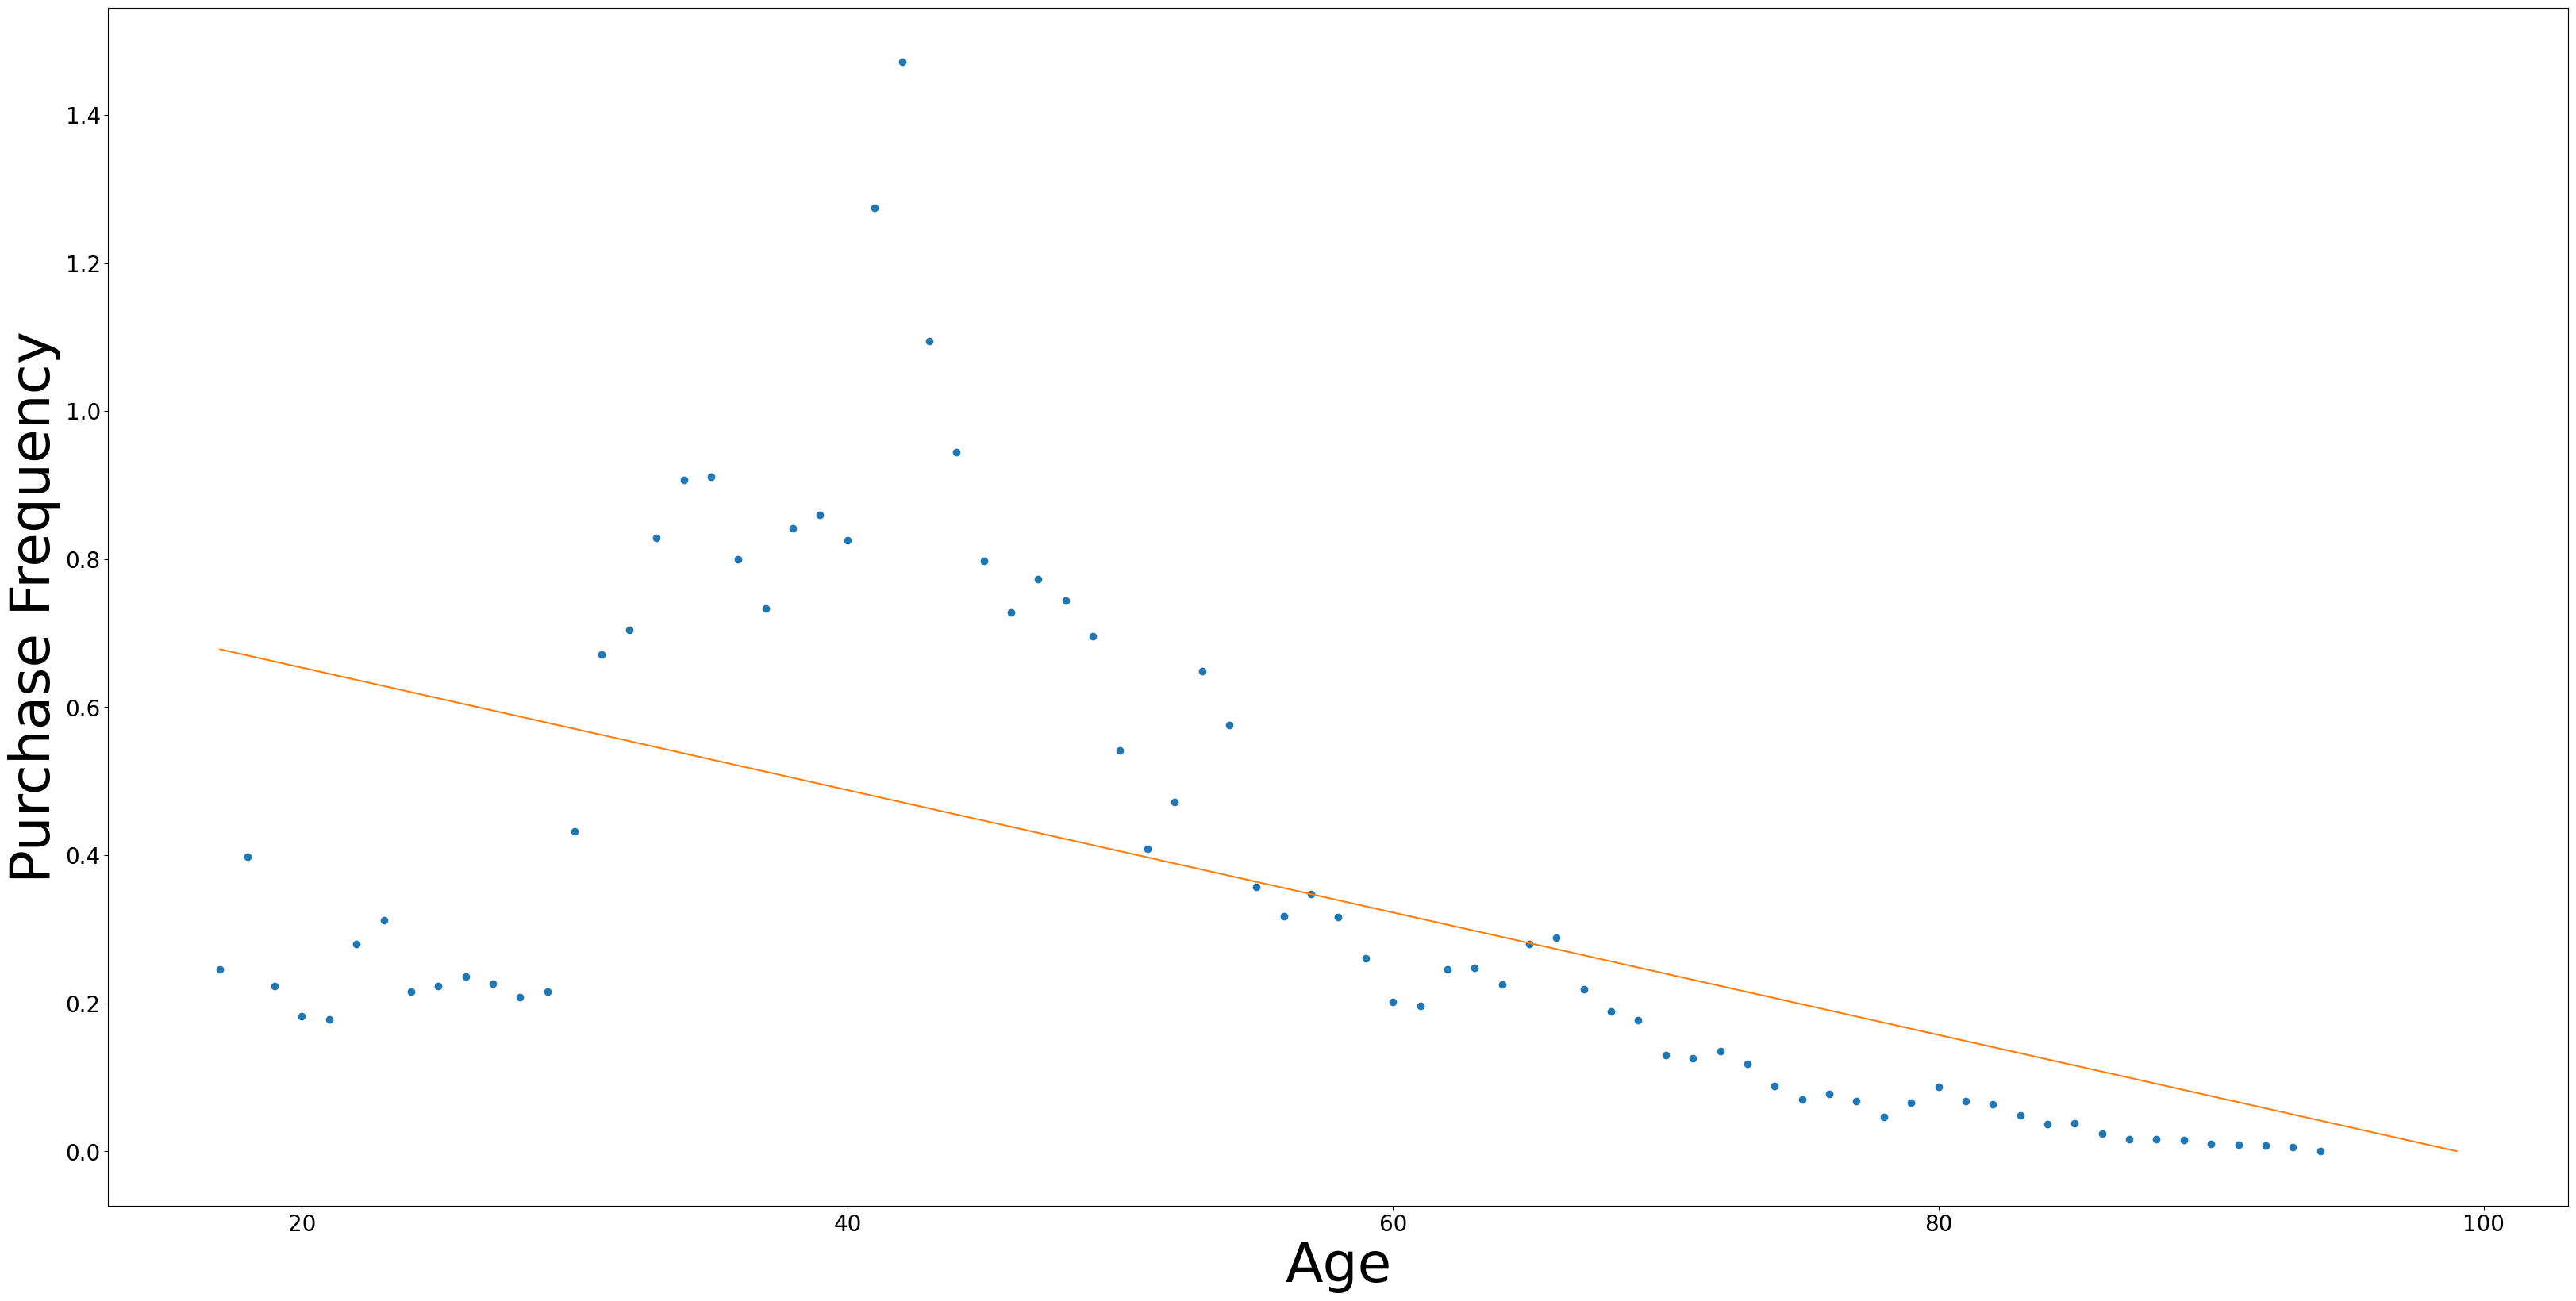

In [36]:
XF = Freq_by_age[["age"]]
YF = Freq_by_age["Purchase_Freq"]
XF = X.copy()
XF['intercept'] = 1.
result = sm.OLS(YF, XF).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(40,20), dpi=100)
plt.xticks(fontsize=20)
plt.xlabel("Age",fontsize = 50)
plt.ylabel("Purchase Frequency",fontsize = 50)
plt.yticks(fontsize=20)
plt.plot(Freq_by_age.age,Freq_by_age.Purchase_Freq, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);

Text(0.5, 1.0, 'Personnes entre 55 et 95 ans ')

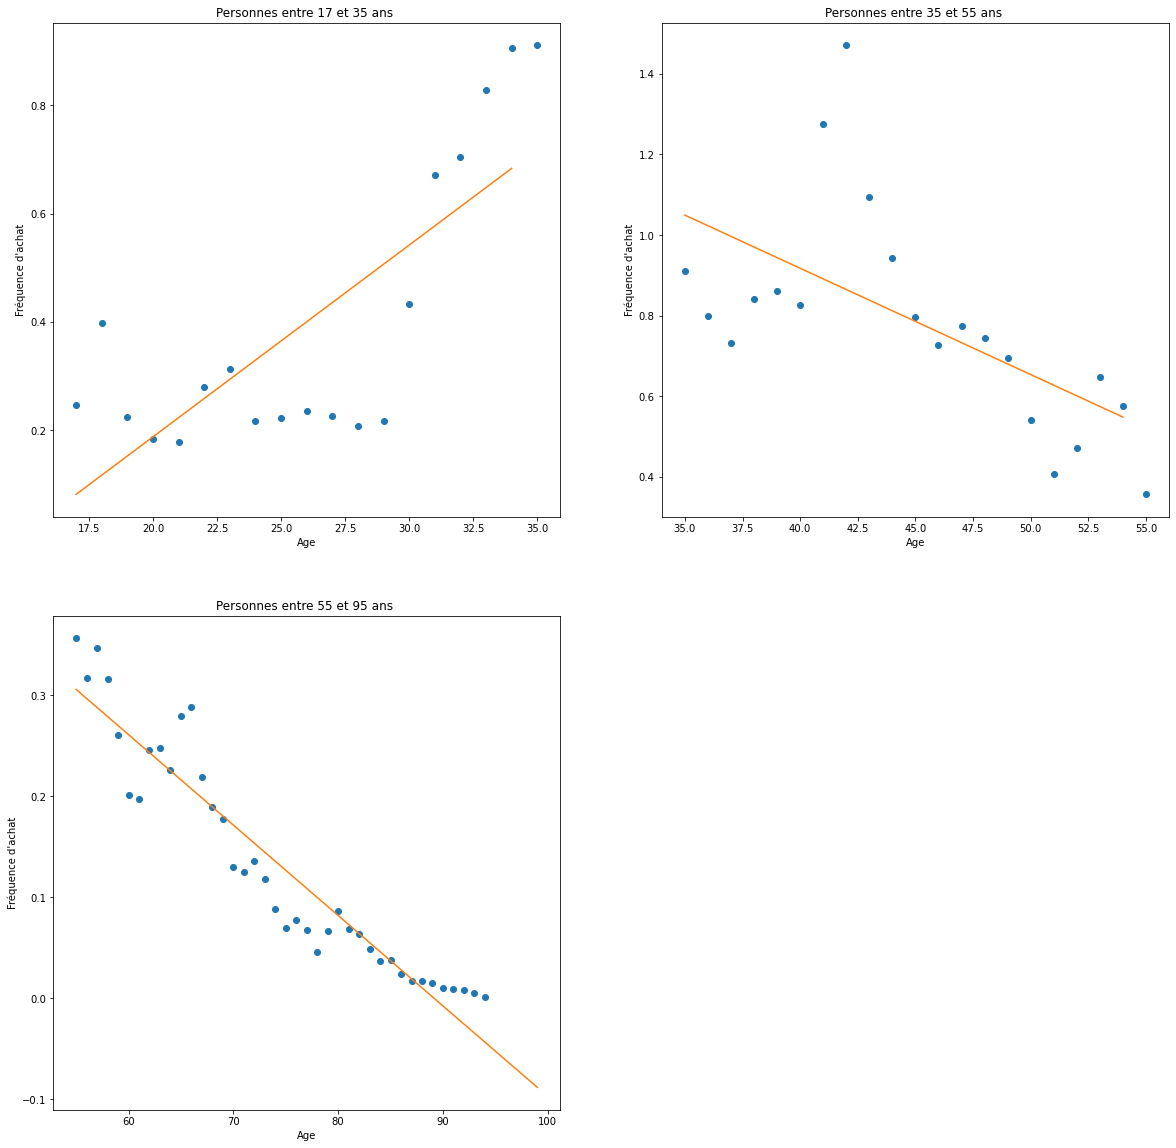

In [37]:
Freq_by_age_under35 = Freq_by_age[Freq_by_age['age'].between(17,35)]
Freq_by_age_between35and55 = Freq_by_age[Freq_by_age['age'].between(35,55)]
Freq_by_age_above55 = Freq_by_age[Freq_by_age['age'].between(55,130)]
Freq_by_age_sub = plt.figure(figsize=(20,20))

ax = Freq_by_age_sub.add_subplot(221)
X1 = Freq_by_age_under35[["age"]]
Y1 = Freq_by_age_under35["Purchase_Freq"]
X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit()
a,b = result.params['age'],result.params['intercept']
ax.plot(Freq_by_age_under35.age,Freq_by_age_under35.Purchase_Freq, "o")
ax.plot(np.arange(17,35),[a*x+b for x in np.arange(17,35)])
ax.set_xlabel("Age")
ax.set_ylabel("Fréquence d'achat")
ax.set_title('Personnes entre 17 et 35 ans ')

ax2 = Freq_by_age_sub.add_subplot(222)
X2 = Freq_by_age_between35and55[["age"]]
Y2 = Freq_by_age_between35and55["Purchase_Freq"]
X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit() 
a,b = result.params['age'],result.params['intercept']
ax2.plot(Freq_by_age_between35and55.age,Freq_by_age_between35and55.Purchase_Freq, "o")
ax2.plot(np.arange(35,55),[a*x+b for x in np.arange(35,55)])
ax2.set_xlabel("Age")
ax2.set_ylabel("Fréquence d'achat")
ax2.set_title('Personnes entre 35 et 55 ans ')


ax3 = Freq_by_age_sub.add_subplot(223)
X3 = Freq_by_age_above55[["age"]]
Y3 = Freq_by_age_above55["Purchase_Freq"]
X3 = X3.copy()
X3['intercept'] = 1.
result = sm.OLS(Y3, X3).fit() 
a,b = result.params['age'],result.params['intercept']
ax3.plot(Freq_by_age_above55.age,Freq_by_age_above55.Purchase_Freq, "o")
ax3.plot(np.arange(55,100),[a*x+b for x in np.arange(55,100)]);
ax3.set_xlabel("Age")
ax3.set_ylabel("Fréquence d'achat")
ax3.set_title('Personnes entre 55 et 95 ans ')


In [38]:
print(stats.pearsonr(Freq_by_age_under35['age'],Freq_by_age_under35['Purchase_Freq']))
print(stats.pearsonr(Freq_by_age_between35and55['age'],Freq_by_age_between35and55['Purchase_Freq']))
print(stats.pearsonr(Freq_by_age_above55['age'],Freq_by_age_above55['Purchase_Freq']))

(0.7609740599262512, 0.00015461771874118336)
(-0.6143744752306699, 0.0030448090955139885)
(-0.9478702398376808, 1.809225632684721e-20)


# Relation entre l'age et le panier moyen

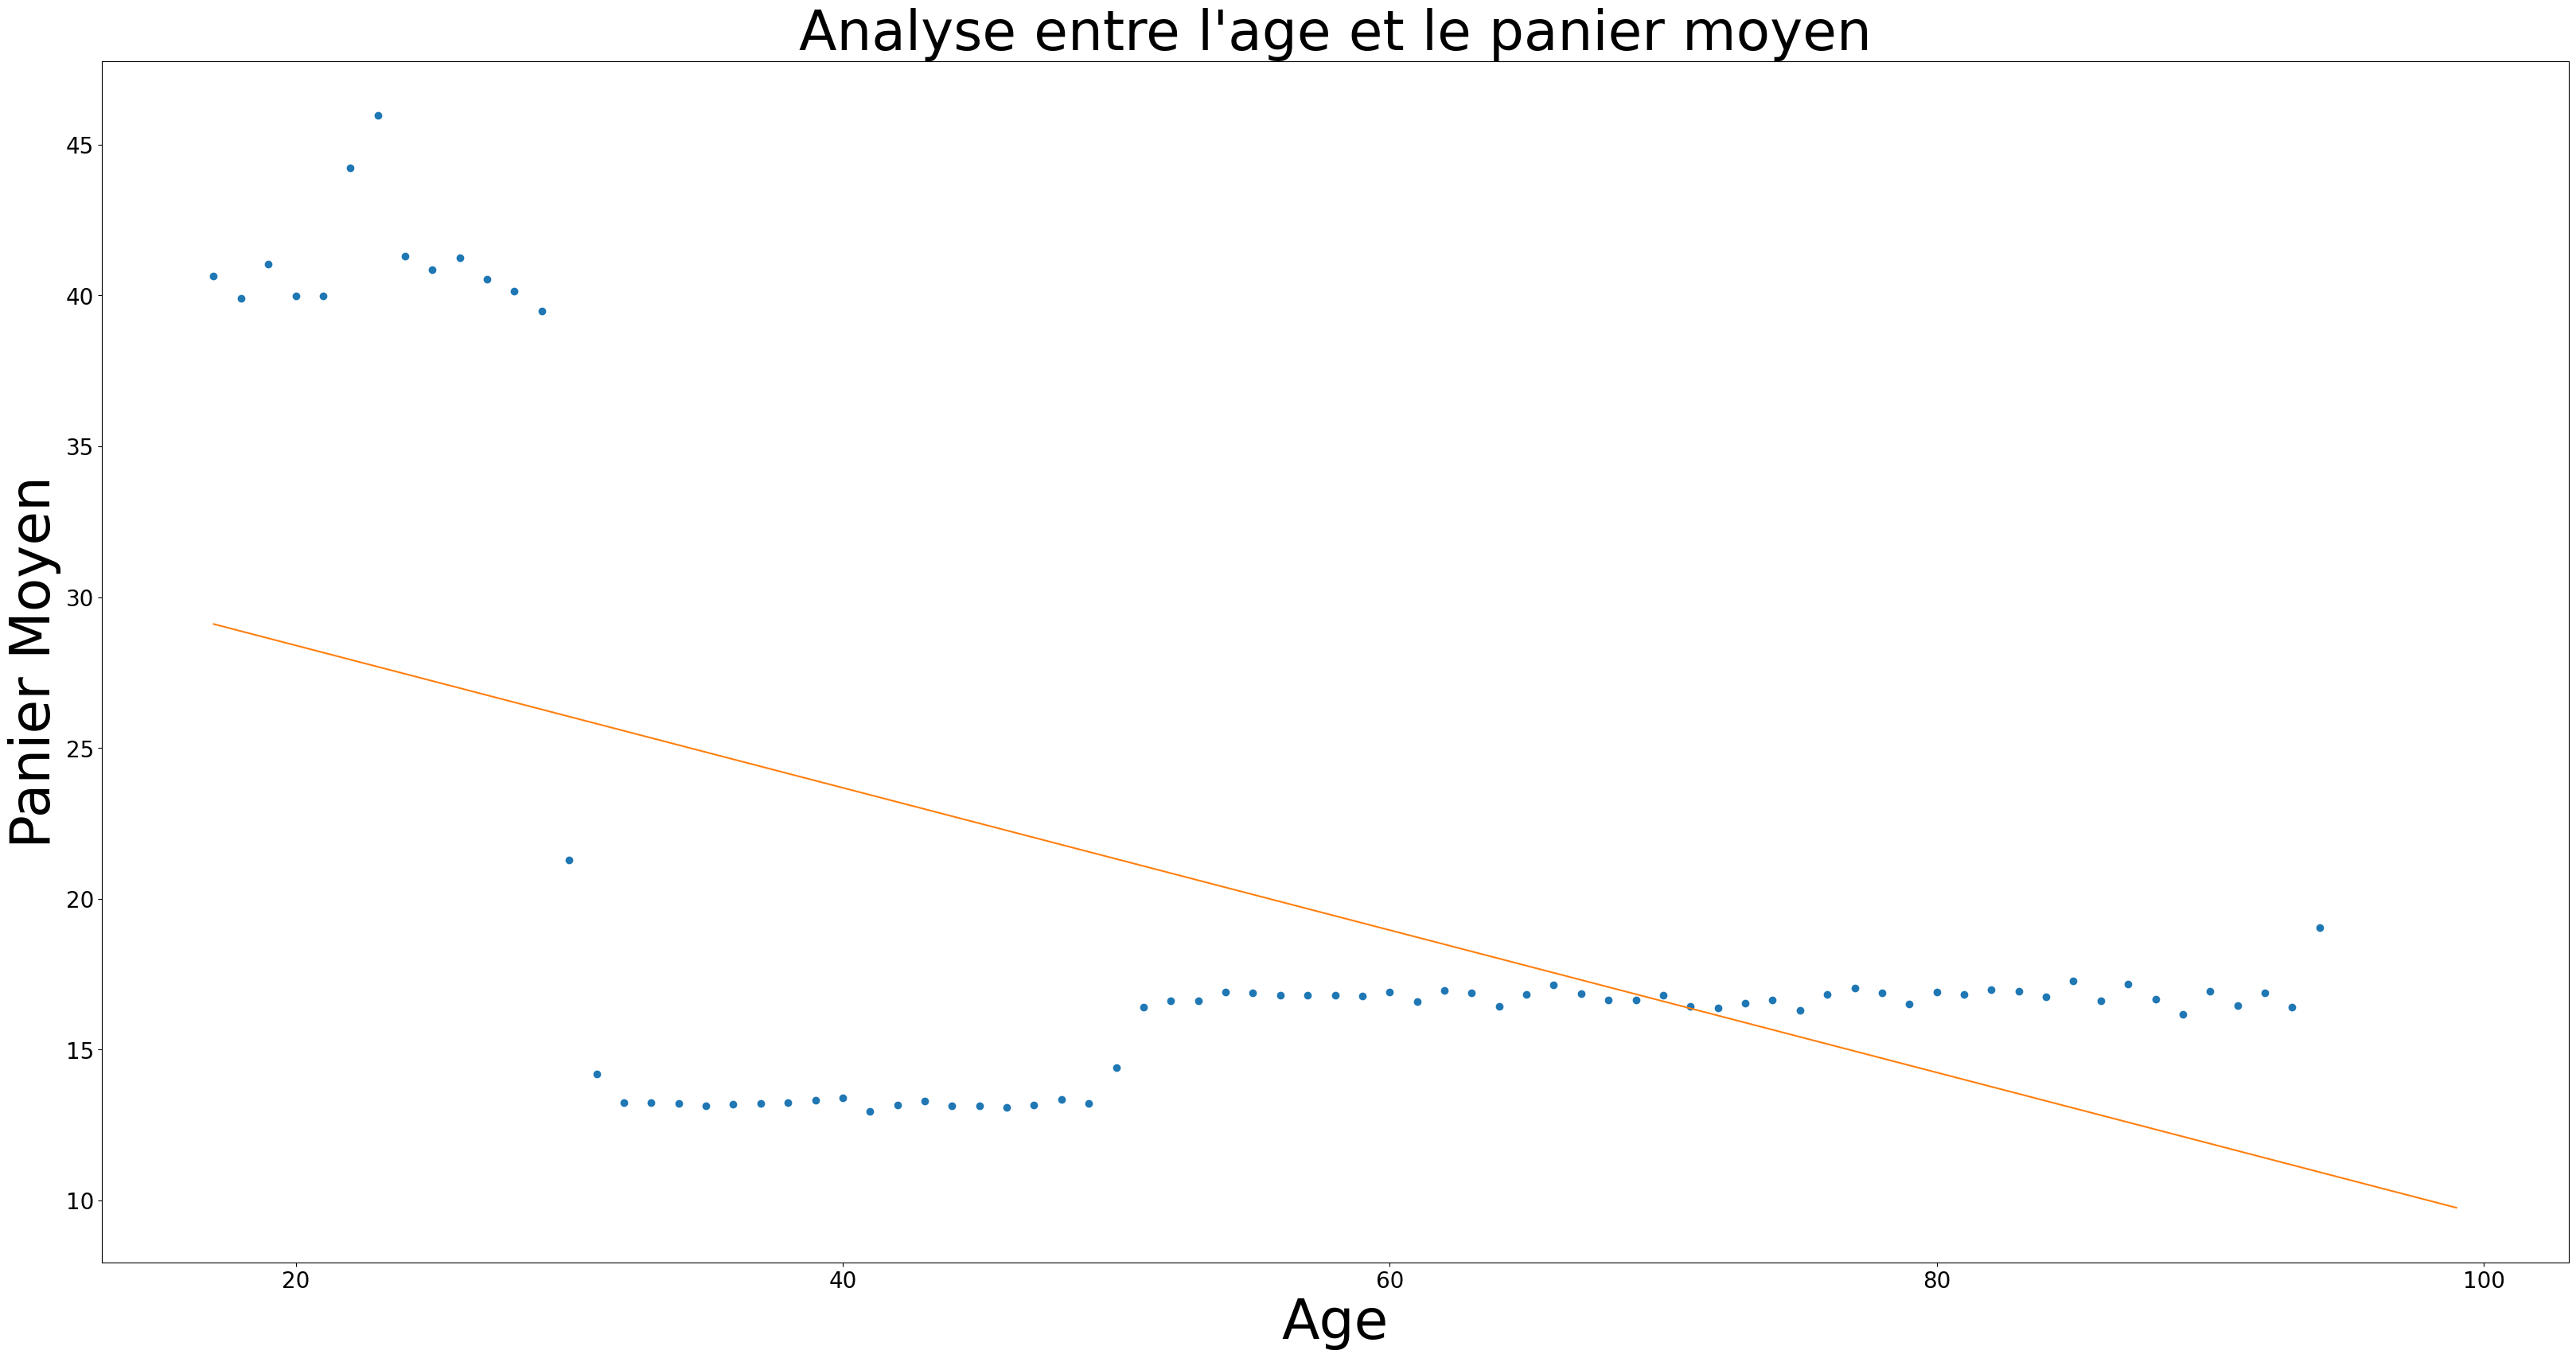

In [39]:
Average_basket_by_age = CA.groupby(['age'], as_index=False)['price'].mean()
X = Average_basket_by_age[["age"]]
Y = Average_basket_by_age["price"]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']
plt.figure(figsize=(40,20), dpi=100)
plt.xticks(fontsize=20)
plt.xlabel("Age",fontsize = 50)
plt.ylabel("Panier Moyen",fontsize = 50)
plt.yticks(fontsize=20)
plt.plot(Average_basket_by_age.age,Average_basket_by_age.price, "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)]);
plt.title("Analyse entre l'age et le panier moyen",fontsize = 50);

Text(0.5, 1.0, 'Personnes entre 50 et 95 ans ')

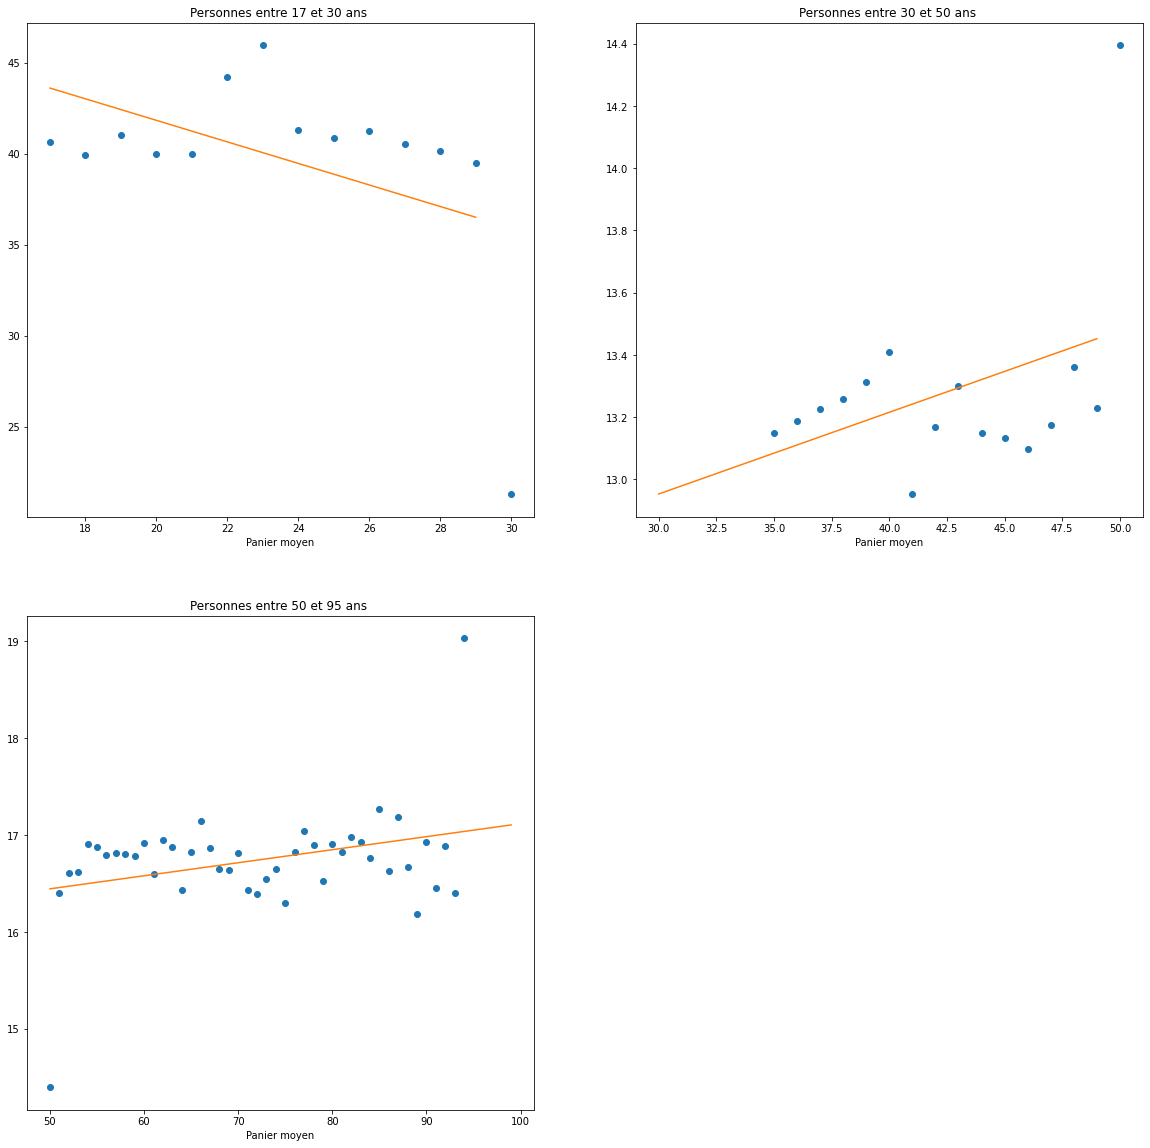

In [40]:
Average_basket_by_age_under30 = Average_basket_by_age[Average_basket_by_age['age'].between(17,30)]
Average_basket_by_age_between30and50 = Average_basket_by_age[Average_basket_by_age['age'].between(35,50)]
Average_basket_by_age_above50 = Average_basket_by_age[Average_basket_by_age['age'].between(50,130)]

Average_basket_by_age_sub = plt.figure(figsize=(20,20))

ax = Average_basket_by_age_sub.add_subplot(221)
X1 = Average_basket_by_age_under30[["age"]]
Y1 = Average_basket_by_age_under30["price"]
X1 = X1.copy()
X1['intercept'] = 1.
result = sm.OLS(Y1, X1).fit()
a,b = result.params['age'],result.params['intercept']
ax.plot(Average_basket_by_age_under30.age,Average_basket_by_age_under30.price, "o")
ax.plot(np.arange(17,30),[a*x+b for x in np.arange(17,30)])
ax.set_xlabel("Age")
ax.set_xlabel("Panier moyen")
ax.set_title('Personnes entre 17 et 30 ans ')

ax2 = Average_basket_by_age_sub.add_subplot(222)
X2 = Average_basket_by_age_between30and50[["age"]]
Y2 = Average_basket_by_age_between30and50["price"]
X2 = X2.copy()
X2['intercept'] = 1.
result = sm.OLS(Y2, X2).fit() 
a,b = result.params['age'],result.params['intercept']
ax2.plot(Average_basket_by_age_between30and50.age,Average_basket_by_age_between30and50.price, "o")
ax2.plot(np.arange(30,50),[a*x+b for x in np.arange(30,50)])
ax2.set_xlabel("Age")
ax2.set_xlabel("Panier moyen")
ax2.set_title('Personnes entre 30 et 50 ans ')


ax3 = Average_basket_by_age_sub.add_subplot(223)
X3 = Average_basket_by_age_above50[["age"]]
Y3 = Average_basket_by_age_above50["price"]
X3 = X3.copy()
X3['intercept'] = 1.
result = sm.OLS(Y3, X3).fit() 
a,b = result.params['age'],result.params['intercept']
ax3.plot(Average_basket_by_age_above50.age,Average_basket_by_age_above50.price, "o")
ax3.plot(np.arange(50,100),[a*x+b for x in np.arange(50,100)]);
ax3.set_xlabel("Age")
ax3.set_xlabel("Panier moyen");
ax3.set_title('Personnes entre 50 et 95 ans ')


In [41]:
print(stats.pearsonr(Average_basket_by_age_under30['age'],Average_basket_by_age_under30["price"]))
print(stats.pearsonr(Average_basket_by_age_between30and50['age'],Average_basket_by_age_between30and50["price"]))
print(stats.pearsonr( Average_basket_by_age_above50['age'],Average_basket_by_age_above50["price"]))

(-0.44112108485188706, 0.11436104561600827)
(0.3948520353639638, 0.1301322801750708)
(0.32283176795509966, 0.03054395221810831)


# Relation entre l'age et la catégorie

# Ici nos échantillons sont indépendants

In [42]:
Categ_by_age = CA
Categ_by_age_test = pd.crosstab(Categ_by_age['age'],Categ_by_age['categ'],margins=False)
Categ_by_age_test = Categ_by_age_test.reset_index(drop=False)
Categ_by_age_test_under50 = Categ_by_age_test[Categ_by_age_test['age'].between(17,50)]
Categ_by_age_test_above50 = Categ_by_age_test[Categ_by_age_test['age'].between(51,100)]

In [43]:
Categ_by_age_1 = CA
Categ_by_age_test1 = Categ_by_age_1.groupby(['age','categ'])['price'].sum()
Categ_by_age_test1 = Categ_by_age_test1.reset_index()
Categ_by_age_test_under501 = Categ_by_age_test1[Categ_by_age_test1['age'].between(17,50)]
Categ_by_age_test_above501 = Categ_by_age_test1[Categ_by_age_test1['age'].between(51,100)]

# Test de normalité a l'aide d'un test de shapiro

Soit notre hypothèse nulle H0 l'hypothese que notre échantillon est issu d'une population normalement distribué.
Nous définissons α notre valeur de signification a 5%. α=0.005
Si p <= α, nous rejetons notre hypothese nulle H0.
Si p > α , échec du rejet de l'hypothese nulle H0.

In [44]:
X = "categ"
Y = "age"
categ_disp = CA[X].unique()
print(stats.shapiro(categ_disp))

ShapiroResult(statistic=1.0, pvalue=0.999998927116394)


Ici nous avons un p-valeur > α nous ne pouvons donc pas rejeter H0 et pouvons accepter le fait que notre échantillon est normalement distribué

# Test d'homogénéité des variances

Soit notre hypothèse nulle H0 l'hypothese que les variances de nos échantillons sont identiques. Nous définissons α notre valeur de signification a 5%. α=0.005 Si p <= α, nous rejetons notre hypothese nulle H0. Si p > α , échec du rejet de l'hypothese nulle H0.

In [45]:
print(stats.bartlett(Categ_by_age_test_under501['categ'],Categ_by_age_test_above501['categ']))

BartlettResult(statistic=0.0010535544362765454, pvalue=0.9741064081505229)


Ici nous avons un p-valeur > α nous ne pouvons donc pas rejeter H0 et pouvons accepter le fait que les variances de nos échantillons sont identiques.

# ANOVA

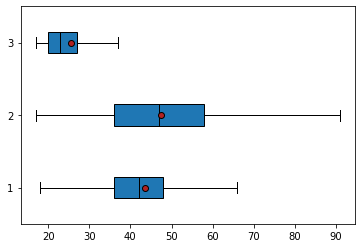

In [46]:
groupes =[]
for m in categ_disp:
    groupes.append(CA[CA[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops,)
plt.show()

In [47]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(CA[X],CA[Y])

0.11902267172053367

Ici pour l'analyse de la variance notre η2 est proche de 0, il n'y a donc apriori pas de relation entre l'age et la categorie

# Analyse de l'égalité des variances a l'aide d'un test de fisher

Définition d'une fonction pour effectuer un test de fisher

In [48]:
#F-test fonction
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

Soit notre hypothèse nulle H0 l'hypothese que nos distribution de même catégorie entre deux groupes d'age différent ont la même variance.
Nous définissons α notre valeur de signification a 5%. α=0.005
Si p <= α, nous rejetons notre hypthose nulle H0.
Si p > α , échec du rejet de l'hyothese nulle H0.
Nous utiliserons comme degrés de liberté pour le numérateur V1 = 33(30) et pour le dénominateur V2 = 43(40) comme référence pour le tableau des valeurs critiques de la distribution F. Voici un lien du tableau : http://fabien.mathy.free.fr/files/Tables_L3.pdf

Test de fisher pour la catégorie 0

In [49]:
f_test(Categ_by_age_test_under50[0],Categ_by_age_test_above50[0])

(19.835313513654203, 1.1102230246251565e-16)

Ici p<α nous rejetons donc H0. Il n'y a pas d'égalité de variance pour la catégorie 0

Test de fisher pour la catégorie 1

In [50]:
f_test(Categ_by_age_test_under50[1],Categ_by_age_test_above50[1])

(0.6167603058011427, 0.9237115135982995)

Ici p>α, nous ne pouvons pas rejeter l'hypothèse H0. Après verification dans notre tableau des valeurs critiques nous observons que notre statistique f (0.616) est inférieur a la valeur critique correspondante(1.74) nous ne pouvons donc pas rejeter l'hypothèse nulle et pouvons accepter l'hypothese que les variances sont égales.

test de fisher pour la catégorie 2

In [51]:
f_test(Categ_by_age_test_under50[2],Categ_by_age_test_above50[2])

(645.2422064290806, 1.1102230246251565e-16)

Ici p<α nous rejetons donc H0. Il n'y a pas d'égalité de variance pour la catégorie 2

# Probabilité qu'une personne achète la référence 0_525 sachant qu'elle a acheté la référence 2_159 

Sachant que tous les clients qui ont acheté 0_525(probabilité A) ont aussi acheté 2_159(probabilité B), A est donc compris dans B dans la représentation de l'intersection, donc la probabilité revient à calcuer p(A)/p(B) ==> 
P(A|B) = P(B∩A)/P(B) = P(A)/P(B)

In [52]:
prob_ref_2159 = CA.loc[CA['id_prod'] == '2_159']
prob_ref_0525 = CA.loc[CA['id_prod'] == '0_525']

In [53]:
prob_ref_2159 = prob_ref_2159.reset_index(drop=True)
prob_ref_2159.drop_duplicates(subset ="client_id",keep = 'first', inplace=True)
prob_ref_0525 = prob_ref_0525.reset_index(drop=True)
prob_ref_0525.drop_duplicates(subset ="client_id",keep = 'first', inplace=True)

In [54]:
prob_ref_21592 = prob_ref_2159.groupby(['id_prod'],as_index=False)['client_id'].count()
prob_ref_05252 = prob_ref_0525.groupby(['id_prod'],as_index=False)['client_id'].count()
prob_ref_05252['client_id']/prob_ref_21592['client_id']*100

0    86.603774
Name: client_id, dtype: float64

Le pourcentage qu'une personne achète la référence  0_525 sachant qu'elle a acheté la référence 2_159 est d'environs 86%